# Lending Club Case Study

To address the business objectives outlined, we will conduct an Exploratory Data Analysis (EDA) to understand the driving factors behind loan default. This will involve identifying strong indicators of default by analyzing various variables related to borrowers and loans.

**Problem Statement**

The company wants to reduce credit loss by identifying risky loan applicants. This involves understanding the driving factors behind loan default.




### Section 1 - Data Collection and Preparation:

Obtain data related to borrowers, loans, and default status. Preprocess the data to handle missing values, outliers, and any inconsistencies.

In [78]:
#import the libraries
import pandas as pd, numpy as np


In [79]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("loan.csv")
inp0.head()


C:\Users\MohammadUddin\AppData\Local\Temp\ipykernel_19868\2289242107.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  inp0 = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [80]:
#Check the shape of the dataframe
inp0.shape

(39717, 111)

In [81]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [82]:
#Check the datatypes of all the columns of the dataframe
inp0.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

#### Missing Value Treatment

In [83]:
#Check the number of null values in the columns
inp0.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [84]:
#Dropping Columns with more than 40 %percent of NULL values:
drop_cols=inp0.columns[inp0.isnull().sum()/inp0.shape[0]*100 > 40]
drop_cols
print(inp0.shape)
print(len(drop_cols))
inp0.drop(columns=drop_cols,axis=1,inplace=True)
print(inp0.shape)


(39717, 111)
57
(39717, 54)



As can be seen we have dropped 57 COLUMNS containing more than 40 percent of NULL values:

In [85]:
analysis_cols=['acc_now_delinq','addr_state', 'annual_inc','annual_inc_joint','application_type','avg_cur_bal','chargeoff_within_12_mths','delinq_2yrs','desc','emp_length','emp_title','grade','home_ownership','installment','int_rate','issue_d','loan_amnt','loan_status','mort_acc','purpose','term','tot_coll_amt','tot_cur_bal','verified_status_joint']
drop_these = list(set(list(inp0)) - set(analysis_cols))
inp0 = inp0.drop(drop_these, axis = 1)


In [86]:
print(inp0.shape)

(39717, 18)


In [87]:
#Drop the rows having null values in the loan_status field
inp1 = inp0[ ~inp0.loan_status.isnull()]

#Check the shape of the dataframe
inp1.shape

(39717, 18)

In [88]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.loan_status.isnull().sum()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [89]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()


loan_amnt                       0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_title                    2459
emp_length                   1075
home_ownership                  0
annual_inc                      0
issue_d                         0
loan_status                     0
desc                        12942
purpose                         0
addr_state                      0
delinq_2yrs                     0
application_type                0
acc_now_delinq                  0
chargeoff_within_12_mths       56
dtype: int64

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [84]:
#Check the nulls in the Android version column again to cross-verify
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])
inp1['Current Ver'].isnull().sum()

#After that do a value_counts()
inp1['Current Ver'].value_counts()

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

In [90]:
#Check the datatypes of all the columns 
inp1.dtypes

loan_amnt                     int64
term                         object
int_rate                     object
installment                 float64
grade                        object
emp_title                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
issue_d                      object
loan_status                  object
desc                         object
purpose                      object
addr_state                   object
delinq_2yrs                   int64
application_type             object
acc_now_delinq                int64
chargeoff_within_12_mths    float64
dtype: object

In [92]:
#Analyse the int_rate column to check the issue
inp1.head()


,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,desc,purpose,addr_state,delinq_2yrs,application_type,acc_now_delinq,chargeoff_within_12_mths
0,5000,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,0,INDIVIDUAL,0,0.0
1,2500,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,0,INDIVIDUAL,0,0.0
2,2400,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Dec-11,Fully Paid,NaN,small_business,IL,0,INDIVIDUAL,0,0.0
3,10000,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,0,INDIVIDUAL,0,0.0
4,3000,60 months,12.69%,67.79,B,University Medical Group,1 year,RENT,80000.0,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,0,INDIVIDUAL,0,0.0


In [93]:
#Write the function to make the changes
inp1.int_rate = inp1.int_rate.apply(lambda x: 0 if x == '0' else float(x[:-1]))


In [94]:
#Verify the dtype of int_rate once again
inp1.int_rate.dtype
inp1.int_rate.value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
11.11    331
12.53    327
16.77    327
10.74    312
6.54     305
6.91     303
8.94     294
7.66     292
13.61    291
15.99    286
13.98    284
13.23    263
11.12    259
13.99    257
6.17     252
10.00    251
12.68    251
10.75    250
10.36    250
11.36    247
16.49    241
11.83    233
18.25    230
10.62    228
14.65    222
13.06    220
10.38    219
10.25    218
15.23    215
14.96    214
16.89    209
15.65    208
11.14    206
6.92     204
12.18    203
17.27    203
15.27    200
15.95    199
16.32    198
14.79    192
8.00     191
17.49    190
12.73    187
15.21    187
9.62     186
15.58    185
9.3

In [97]:
#Analyse the Reviews column
inp1.dtypes

loan_amnt                     int64
term                         object
int_rate                    float64
installment                 float64
grade                        object
emp_title                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
issue_d                      object
loan_status                  object
desc                         object
purpose                      object
addr_state                   object
delinq_2yrs                   int64
application_type             object
acc_now_delinq                int64
chargeoff_within_12_mths    float64
dtype: object

In [98]:
#Change the dtype of this column
inp1.term = inp1.term.apply(lambda x: 0 if x == '0' else int(x[:-6]))

#Check the quantitative spread of this dataframe
inp1.term.describe()


count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [134]:
inp1.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [140]:
inp1.emp_length.apply(lambda x: '0 years' if x == '< 1 year' else x)
inp1.emp_length.apply(lambda x: '1 years' if x == '1 year' else x)
inp1.emp_length.apply(lambda x: '10 years' if x == '10+ years' else x)

0        10 years
1        < 1 year
2        10 years
3        10 years
4          1 year
           ...   
39712     4 years
39713     3 years
39714    < 1 year
39715    < 1 year
39716    < 1 year
Name: emp_length, Length: 39717, dtype: object

In [142]:
inp1.emp_length.map(lambda x: x[:-1])

TypeError: 'float' object is not subscriptable

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [64]:
#Perform the sanity checks on the Reviews column
inp1.dtypes
inp1
#inp1.Rating.describe()
#inp1 = inp1[inp1.Reviews <= inp1.Installs]


,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,desc,purpose,addr_state,delinq_2yrs,application_type,acc_now_delinq,chargeoff_within_12_mths
0,5000,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,0,INDIVIDUAL,0,0.0
1,2500,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,0,INDIVIDUAL,0,0.0
2,2400,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Dec-11,Fully Paid,NaN,small_business,IL,0,INDIVIDUAL,0,0.0
3,10000,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,0,INDIVIDUAL,0,0.0
4,3000,60 months,12.69%,67.79,B,University Medical Group,1 year,RENT,80000.0,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,0,INDIVIDUAL,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07%,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Jul-07,Fully Paid,Our current gutter system on our home is old a...,home_improvement,CO,0,INDIVIDUAL,0,NaN
39713,8500,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Jul-07,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,NC,1,INDIVIDUAL,0,NaN
39714,5000,36 months,8.07%,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Jul-07,Fully Paid,NaN,debt_consolidation,MA,0,INDIVIDUAL,0,NaN
39715,5000,36 months,7.43%,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Jul-07,Fully Paid,NaN,other,MD,0,INDIVIDUAL,0,NaN


In [119]:
#perform the sanity checks on prices of free apps 
inp1[(inp1["Price"] > 0) & (inp1["Type"] == 'Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [72]:
inp1.head(2)

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,desc,purpose,addr_state,delinq_2yrs,application_type,acc_now_delinq,chargeoff_within_12_mths
0,5000,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,0,INDIVIDUAL,0,0.0
1,2500,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,0,INDIVIDUAL,0,0.0


#Univariate 

1.Unordered Categorical Variables

a.)home_ownership


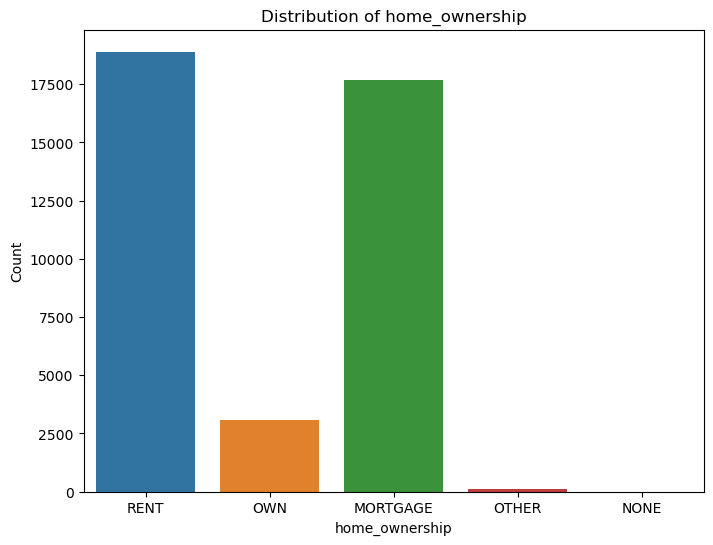

In [106]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', data=inp1)
plt.title('Distribution of home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.show()

purpose,


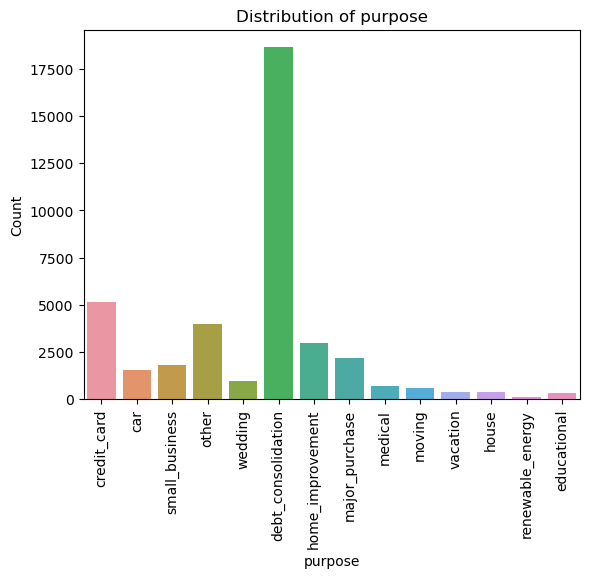

In [108]:
sns.countplot(x='purpose', data=inp1)
plt.title('Distribution of purpose')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

application_type


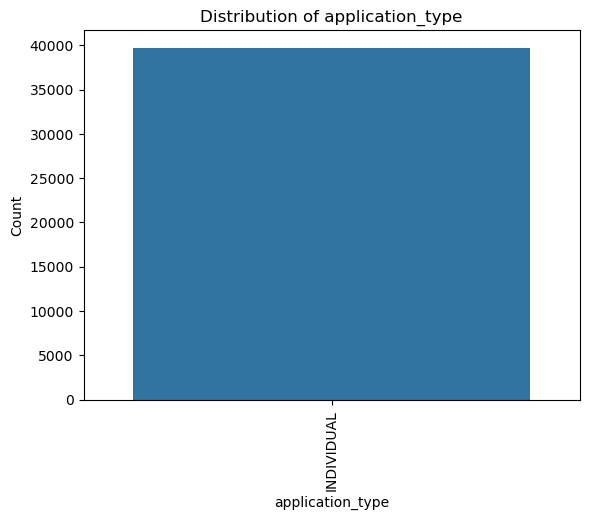

In [109]:
sns.countplot(x='application_type', data=inp1)
plt.title('Distribution of application_type')
plt.xlabel('application_type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

emp_type

In [153]:
sns.countplot(x='emp_type', data=inp1)
plt.title('Distribution of emp_type')
plt.xlabel('emp_type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret input 'emp_type'

2.Ordered Categorical Variables

term


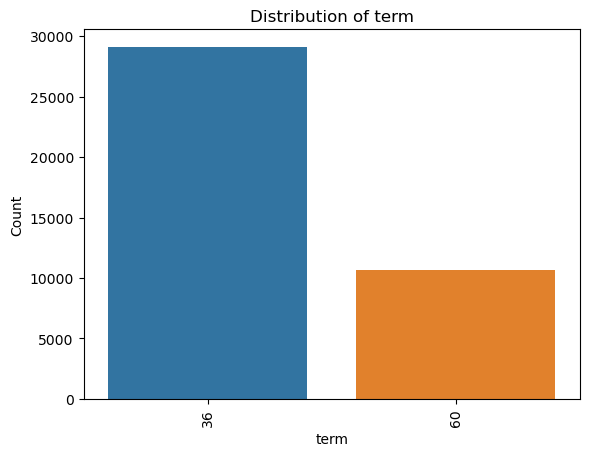

In [112]:
sns.countplot(x='term', data=inp1)
plt.title('Distribution of term')
plt.xlabel('term')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

grade,


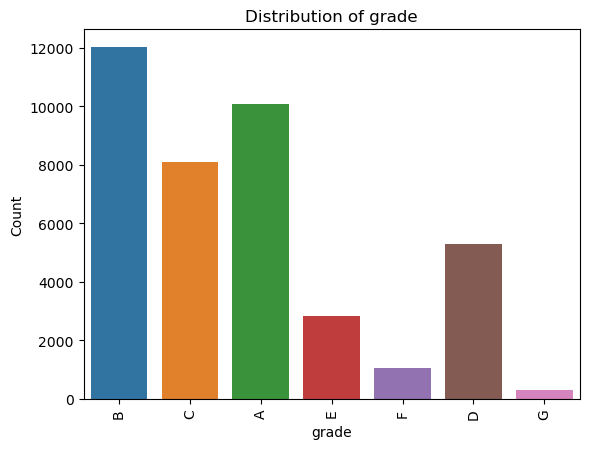

In [113]:
sns.countplot(x='grade', data=inp1)
plt.title('Distribution of grade')
plt.xlabel('grade')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

issue_d,


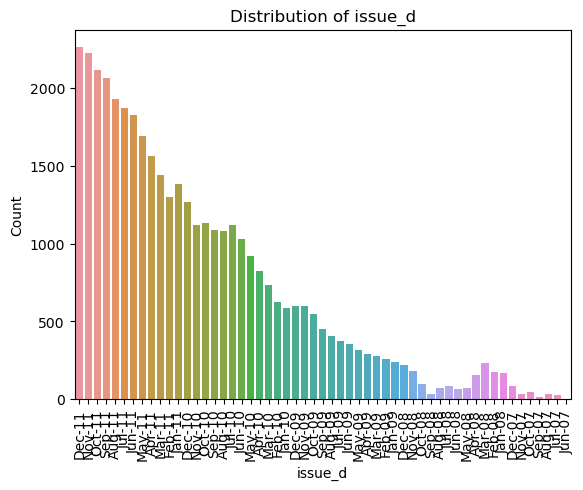

In [154]:
sns.countplot(x='issue_d', data=inp1)
plt.title('Distribution of issue_d')
plt.xlabel('issue_d')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

loan_status


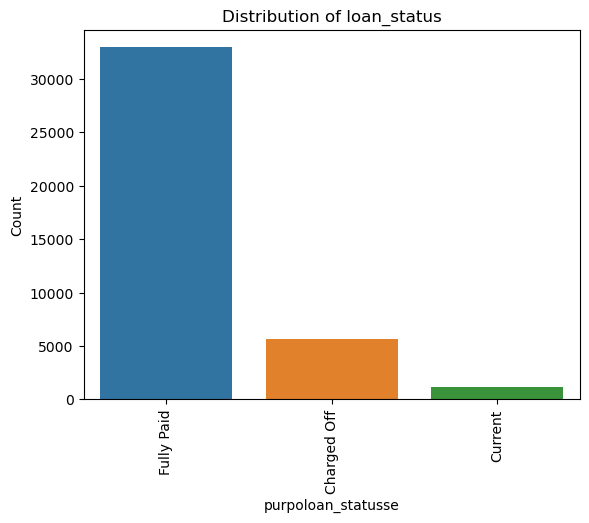

In [114]:
sns.countplot(x='loan_status', data=inp1)
plt.title('Distribution of loan_status')
plt.xlabel('purpoloan_statusse')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

3.Quantitative Variables

loan_amount,


In [117]:
inp1

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,desc,purpose,addr_state,delinq_2yrs,application_type,acc_now_delinq,chargeoff_within_12_mths
0,5000,36,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,0,INDIVIDUAL,0,0.0
1,2500,60,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,0,INDIVIDUAL,0,0.0
2,2400,36,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Dec-11,Fully Paid,NaN,small_business,IL,0,INDIVIDUAL,0,0.0
3,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,0,INDIVIDUAL,0,0.0
4,3000,60,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,0,INDIVIDUAL,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36,8.07,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Jul-07,Fully Paid,Our current gutter system on our home is old a...,home_improvement,CO,0,INDIVIDUAL,0,NaN
39713,8500,36,10.28,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Jul-07,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,NC,1,INDIVIDUAL,0,NaN
39714,5000,36,8.07,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Jul-07,Fully Paid,NaN,debt_consolidation,MA,0,INDIVIDUAL,0,NaN
39715,5000,36,7.43,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Jul-07,Fully Paid,NaN,other,MD,0,INDIVIDUAL,0,NaN


<Axes: >

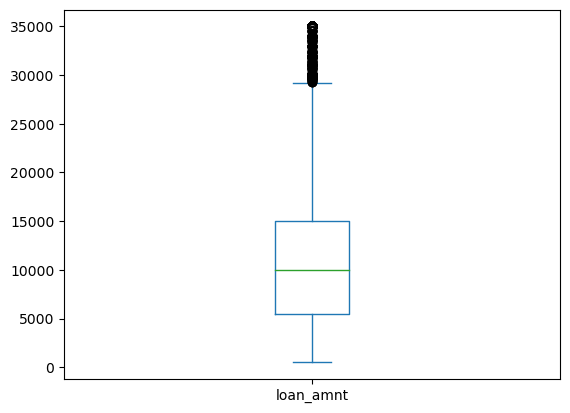

In [118]:
inp1.loan_amnt.plot.box()

int_rate


<Axes: >

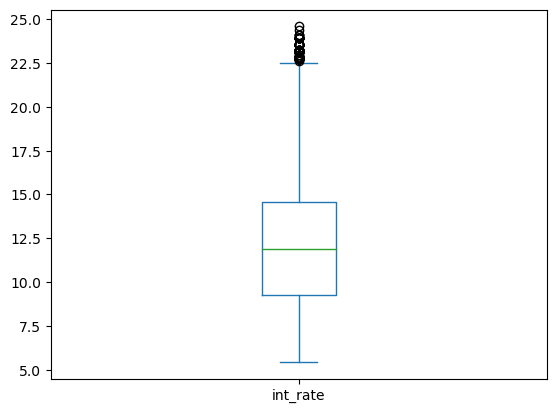

In [119]:
inp1.int_rate.plot.box()

installment


<Axes: >

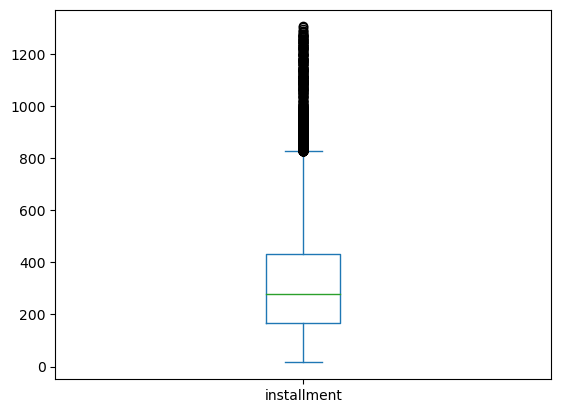

In [120]:
inp1.installment.plot.box()

annual_inc


<Axes: >

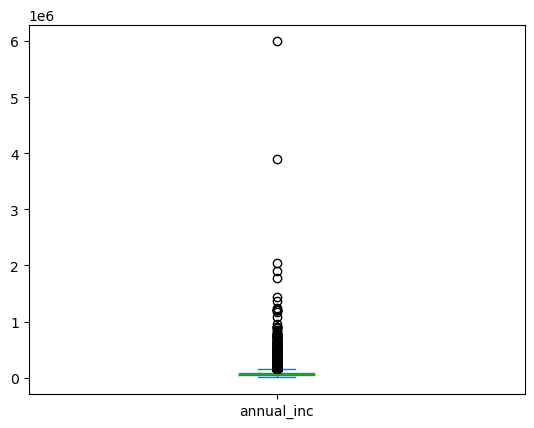

In [121]:
inp1.annual_inc.plot.box()


#Segmented Univariates

emp_length


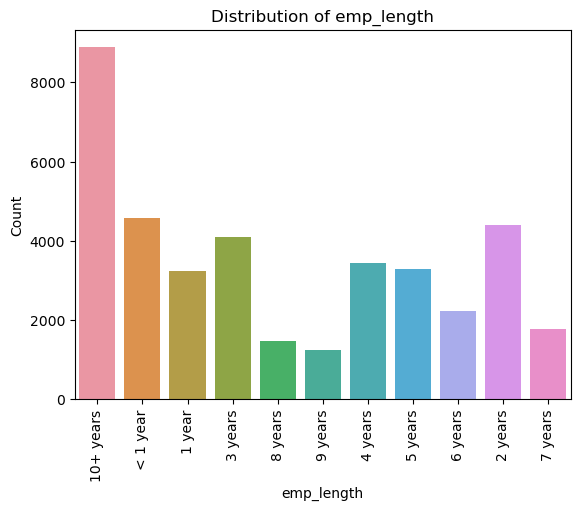

In [143]:
sns.countplot(x='emp_length', data=inp1)
plt.title('Distribution of emp_length')
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


#Bivariate 
1.Continous Variables



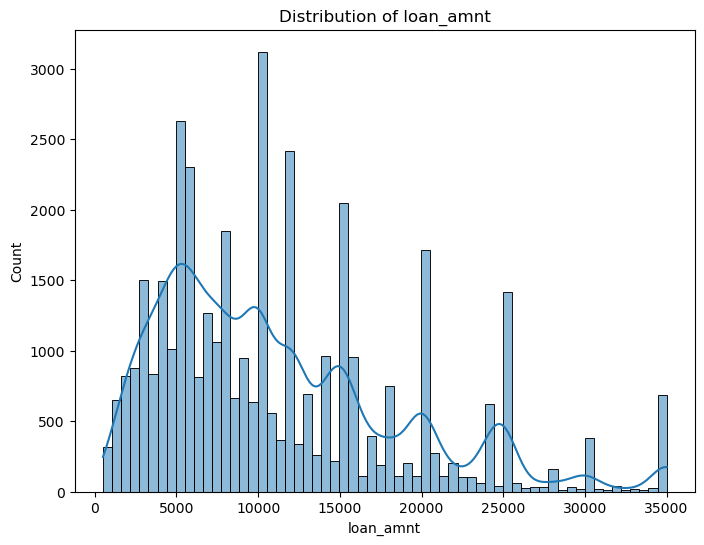

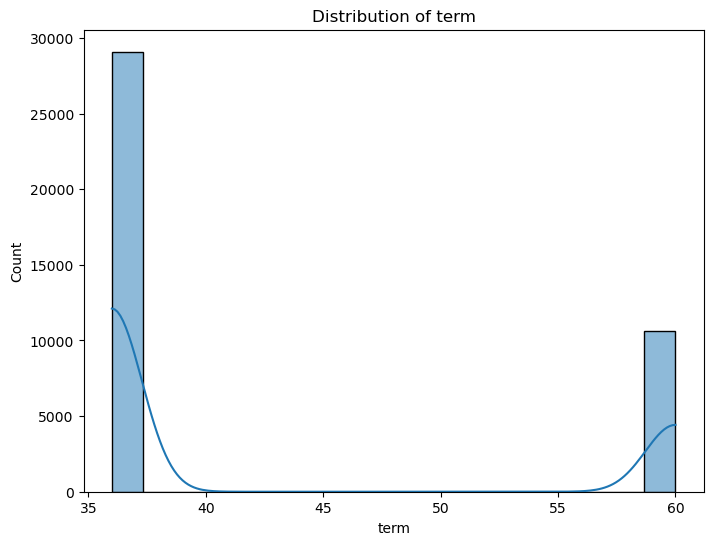

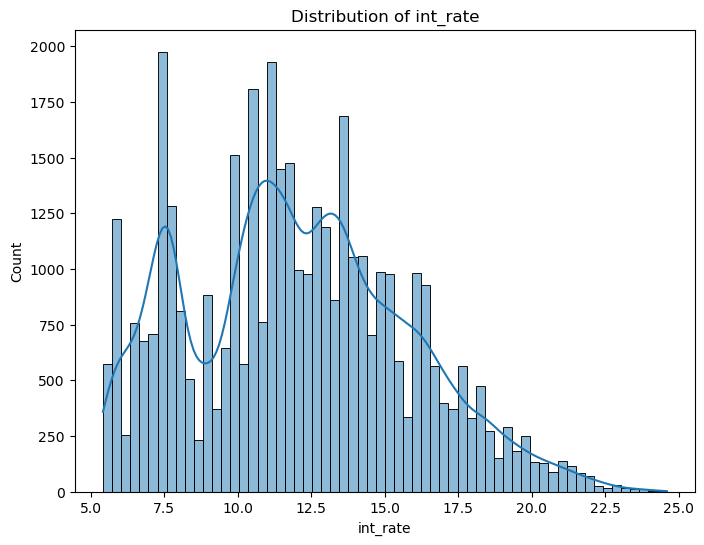

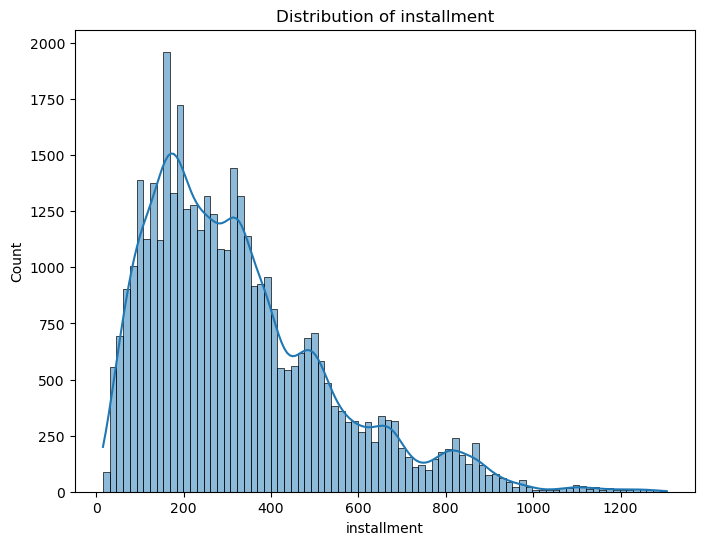

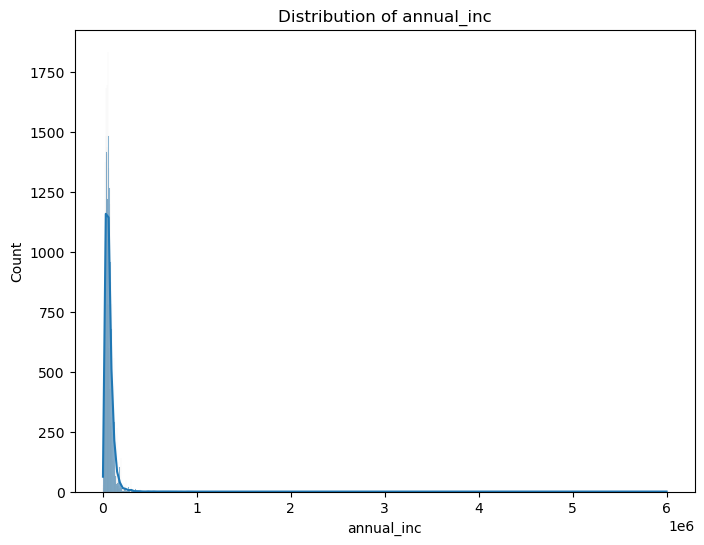

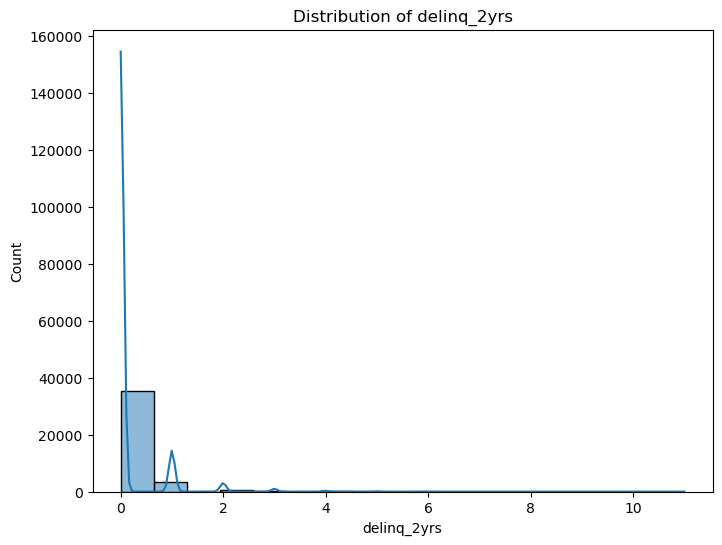

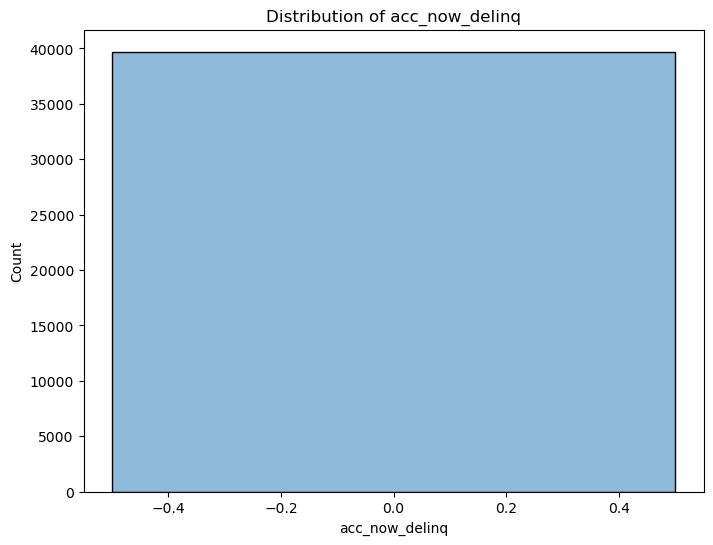

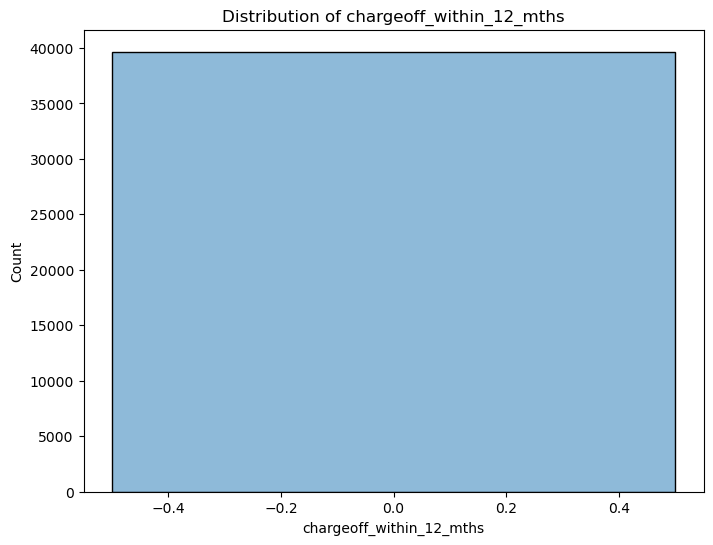

In [144]:
numerical_cols = inp1.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(inp1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

2.Categorical Variables


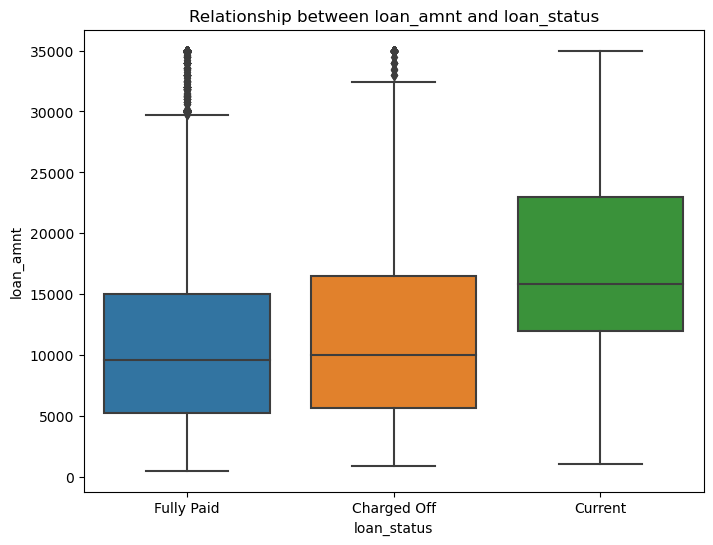

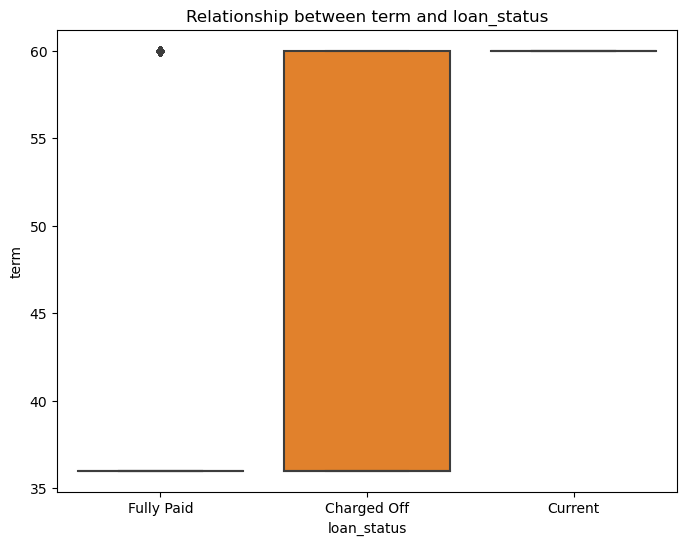

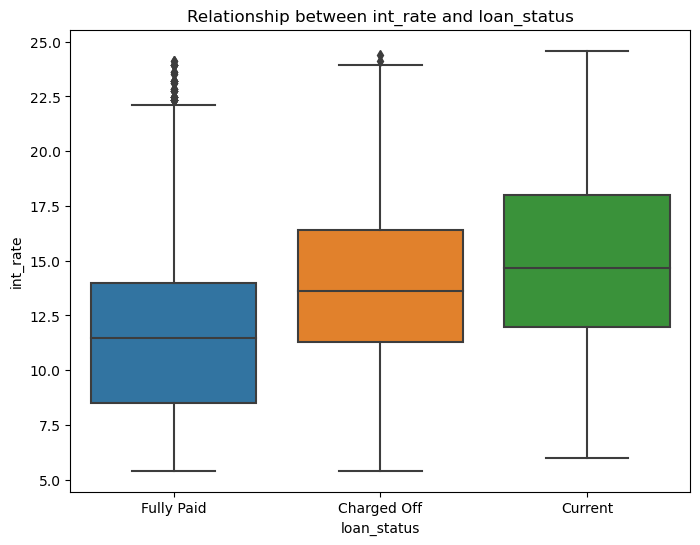

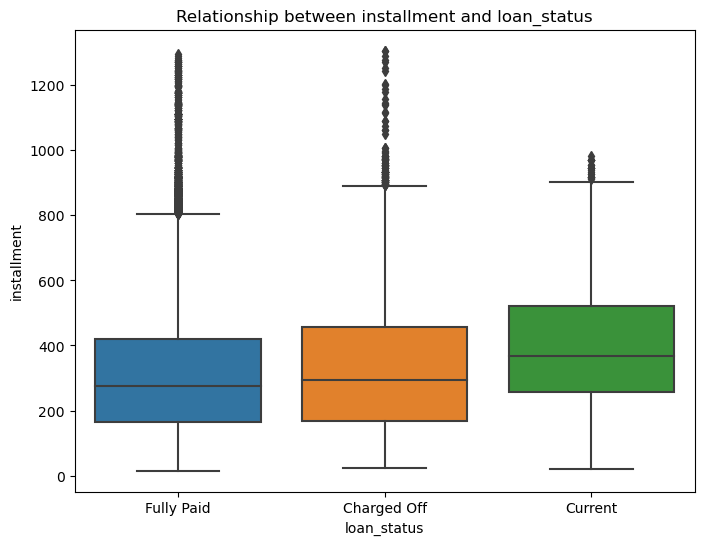

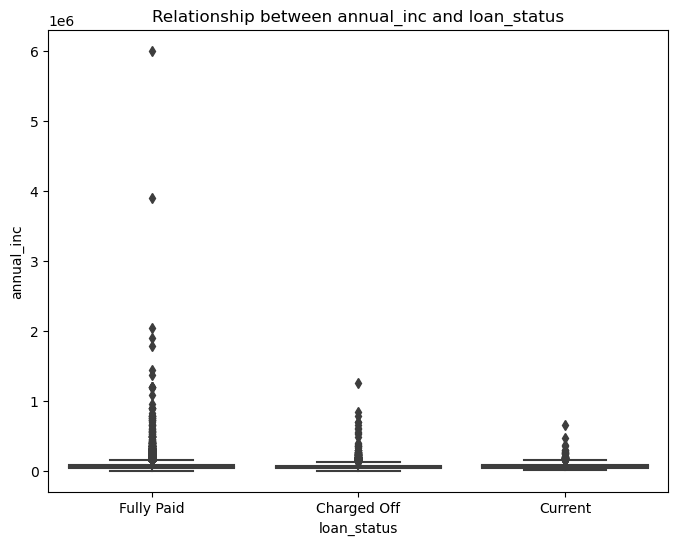

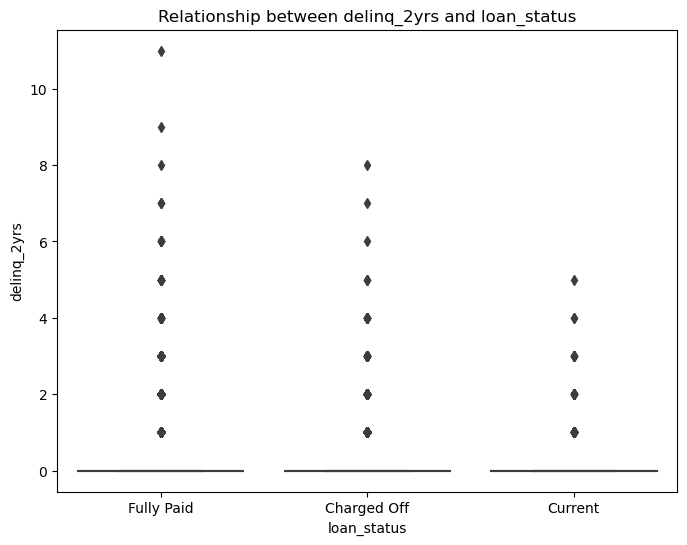

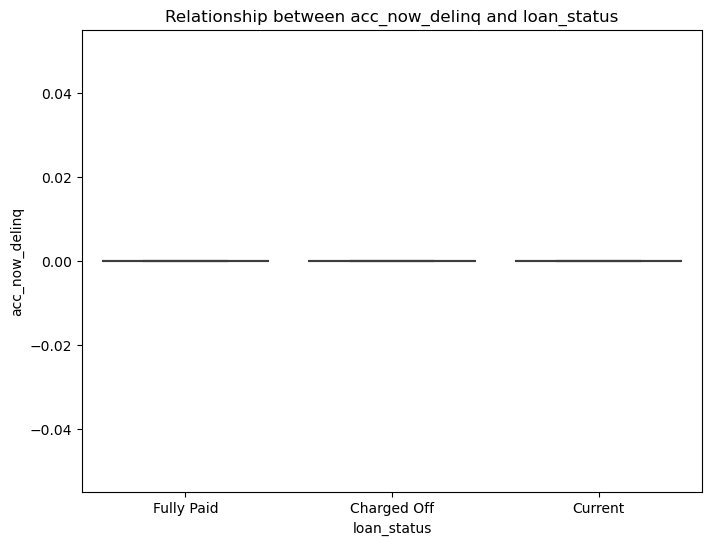

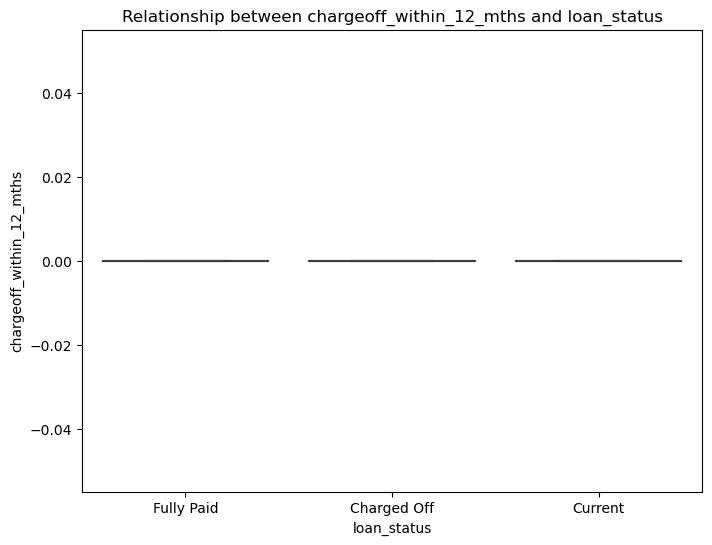

In [146]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='loan_status', y=col, data=inp1)
    plt.title(f'Relationship between {col} and loan_status')
    plt.xlabel('loan_status')
    plt.ylabel(col)
    plt.show()

In [150]:
inp1.head(1)

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,desc,purpose,addr_state,delinq_2yrs,application_type,acc_now_delinq,chargeoff_within_12_mths
0,5000,36,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,0,INDIVIDUAL,0,0.0


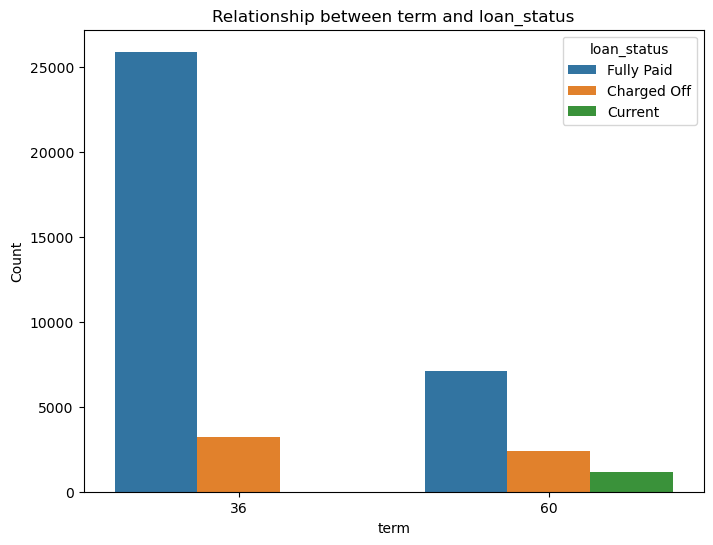

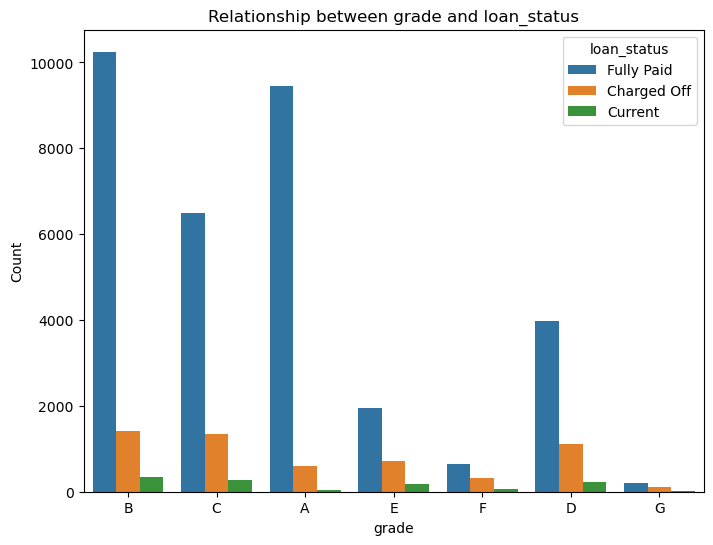

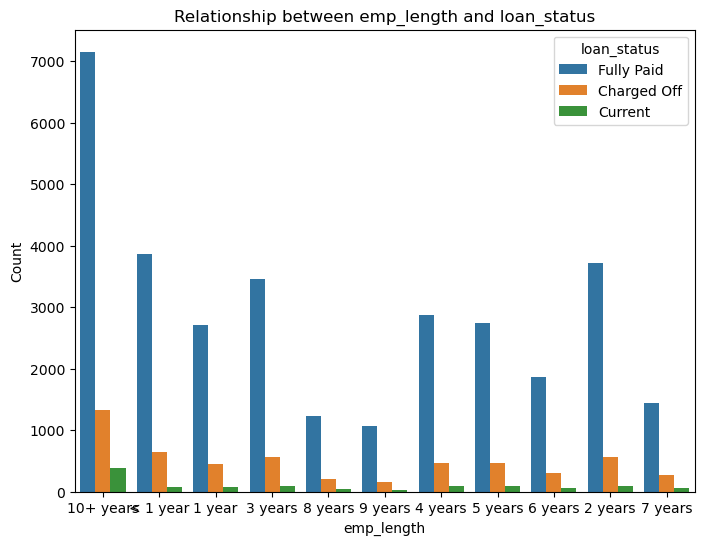

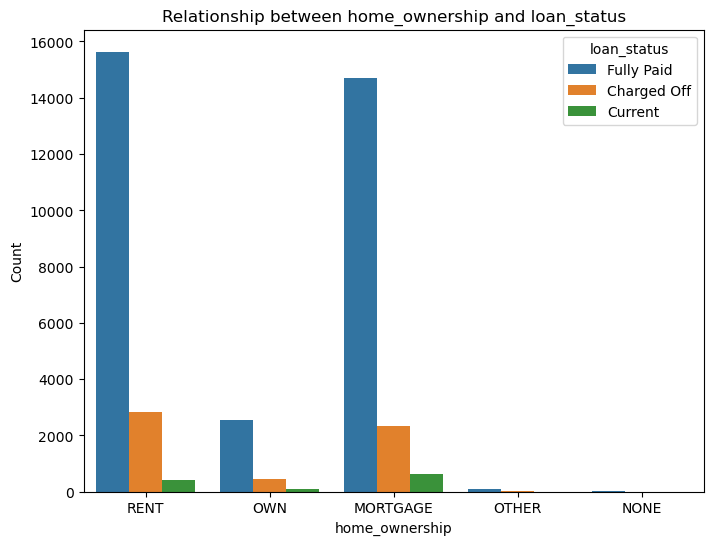

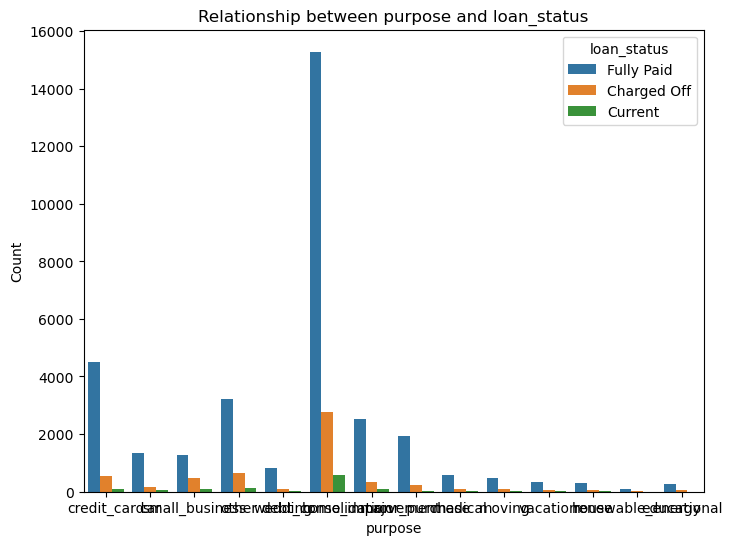

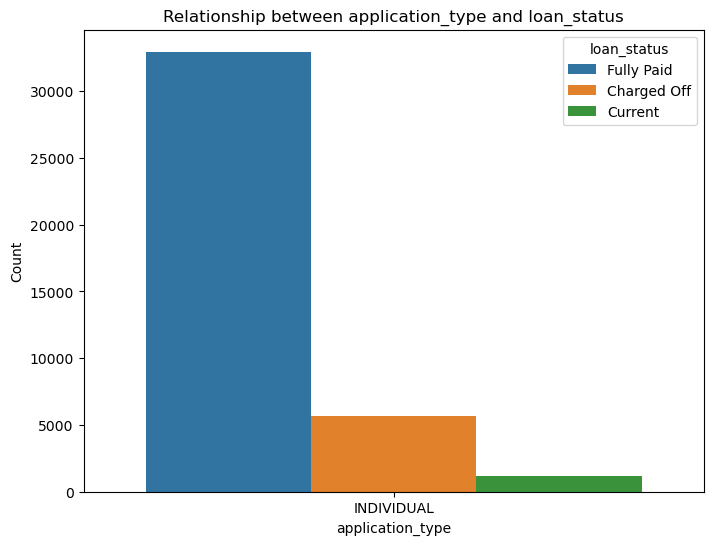

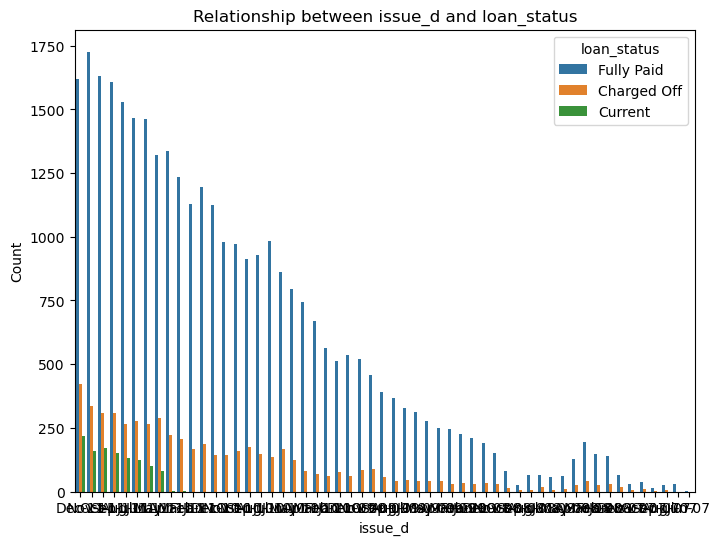

In [155]:
categorical_cols = list(['term', 'grade', 'emp_length', 'home_ownership', 'purpose', 'application_type', 'issue_d'])
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='loan_status', data=inp1)
    plt.title(f'Relationship between {col} and loan_status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='loan_status', loc='upper right')
    plt.show()

#Derived Metrics
1.Type Driven


In [156]:
inp1

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,desc,purpose,addr_state,delinq_2yrs,application_type,acc_now_delinq,chargeoff_within_12_mths
0,5000,36,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,0,INDIVIDUAL,0,0.0
1,2500,60,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,0,INDIVIDUAL,0,0.0
2,2400,36,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Dec-11,Fully Paid,NaN,small_business,IL,0,INDIVIDUAL,0,0.0
3,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,0,INDIVIDUAL,0,0.0
4,3000,60,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,0,INDIVIDUAL,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36,8.07,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Jul-07,Fully Paid,Our current gutter system on our home is old a...,home_improvement,CO,0,INDIVIDUAL,0,NaN
39713,8500,36,10.28,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Jul-07,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,NC,1,INDIVIDUAL,0,NaN
39714,5000,36,8.07,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Jul-07,Fully Paid,NaN,debt_consolidation,MA,0,INDIVIDUAL,0,NaN
39715,5000,36,7.43,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Jul-07,Fully Paid,NaN,other,MD,0,INDIVIDUAL,0,NaN


2.Business Driven

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [101]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [69]:
#Create a box plot for the price column
inp1
#plt.boxplot(inp1)
#plt.show()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,desc,purpose,addr_state,delinq_2yrs,application_type,acc_now_delinq,chargeoff_within_12_mths
0,5000,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,0,INDIVIDUAL,0,0.0
1,2500,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,0,INDIVIDUAL,0,0.0
2,2400,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Dec-11,Fully Paid,NaN,small_business,IL,0,INDIVIDUAL,0,0.0
3,10000,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,0,INDIVIDUAL,0,0.0
4,3000,60 months,12.69%,67.79,B,University Medical Group,1 year,RENT,80000.0,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,0,INDIVIDUAL,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07%,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Jul-07,Fully Paid,Our current gutter system on our home is old a...,home_improvement,CO,0,INDIVIDUAL,0,NaN
39713,8500,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Jul-07,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,NC,1,INDIVIDUAL,0,NaN
39714,5000,36 months,8.07%,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Jul-07,Fully Paid,NaN,debt_consolidation,MA,0,INDIVIDUAL,0,NaN
39715,5000,36 months,7.43%,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Jul-07,Fully Paid,NaN,other,MD,0,INDIVIDUAL,0,NaN


In [124]:
#Check the apps with price more than 200
inp1 = inp1[inp1.Price < 200]
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<Axes: >

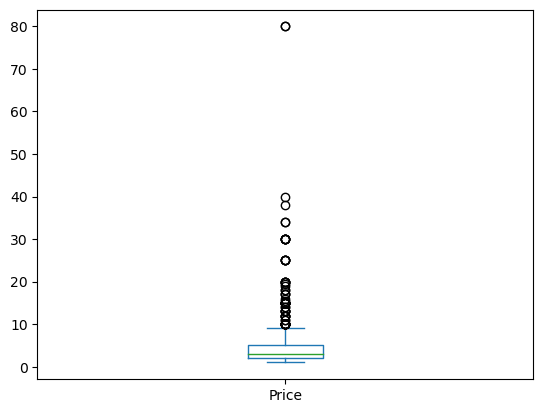

In [126]:
#Clean the Price column
inp1[inp1.Price > 0].Price.plot.box()

In [ ]:
#Create a box plot for paid apps



In [127]:
#Check the apps with price more than 30
inp1[inp1.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [130]:
#Clean the Price column again
inp1 = inp1[inp1.Price < 30]
inp1.shape

(9338, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

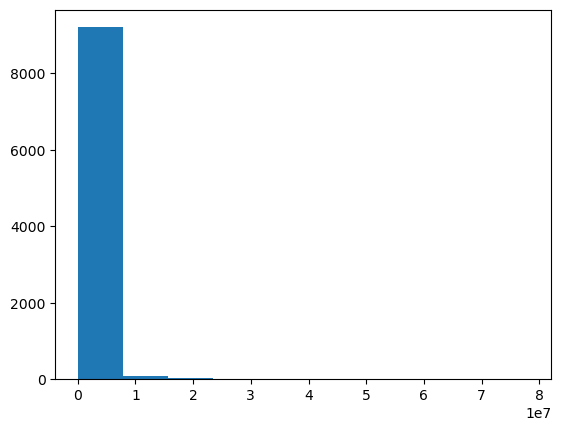

In [132]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)
plt.show()

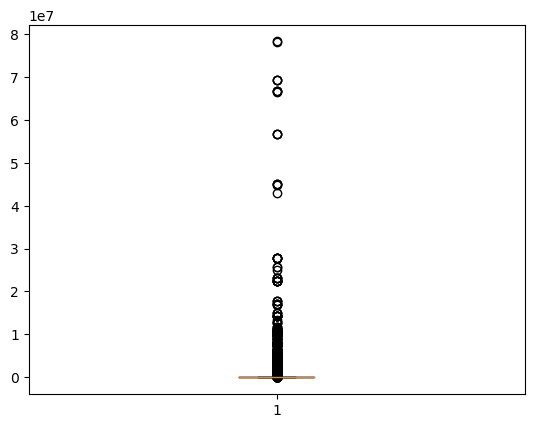

In [133]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()

In [134]:
#Check records with 1 million reviews
inp1[inp1.Reviews >= 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [136]:
#Drop the above records
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

(array([7168.,  521.,  314.,  169.,  127.,  114.,   69.,   49.,   55.,
          48.]),
 array([1.000000e+00, 9.950110e+04, 1.990012e+05, 2.985013e+05,
        3.980014e+05, 4.975015e+05, 5.970016e+05, 6.965017e+05,
        7.960018e+05, 8.955019e+05, 9.950020e+05]),
 <BarContainer object of 10 artists>)

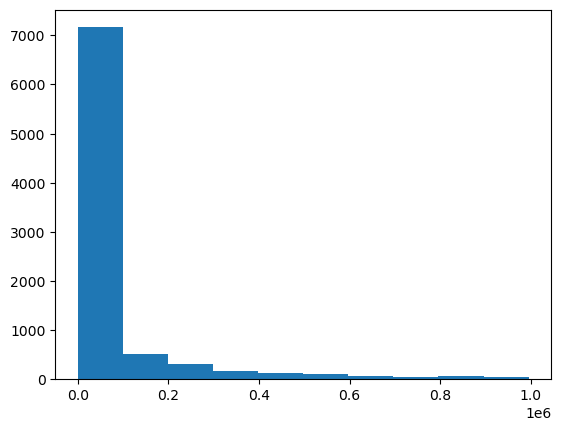

In [137]:
#Question - Create a histogram again and check the peaks

plt.hist(inp1.Reviews)

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

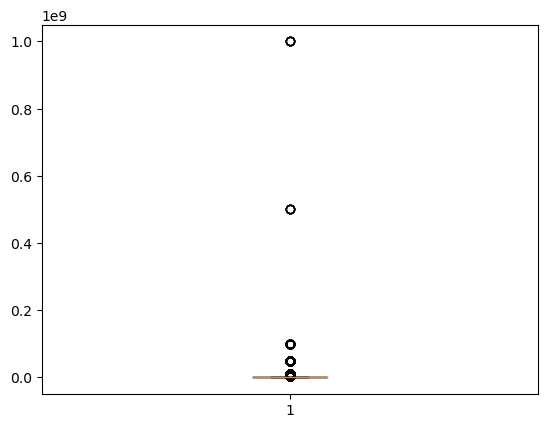

In [139]:
#Question - Create a box plot for the Installs column and report back the IQR

plt.boxplot(inp1.Installs)
inp1.Installs.describe()

In [143]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1 = inp1[inp1.Installs < 100000000]
inp1.shape

(8573, 13)

(array([3216., 1348., 2190.,  562.,  422.,  269.,  177.,  126.,  106.,
         157.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

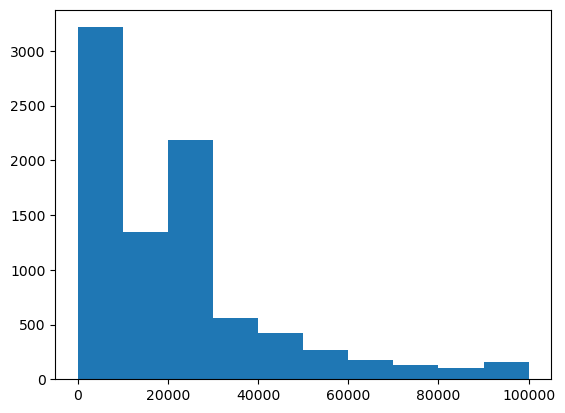

In [144]:
#Plot a histogram for Size as well.
plt.hist(inp1.Size)

In [145]:
#Question - Create a boxplot for the Size column and report back the median value
inp1.Size.describe()

count      8573.000000
mean      21625.064264
std       20712.753555
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [102]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

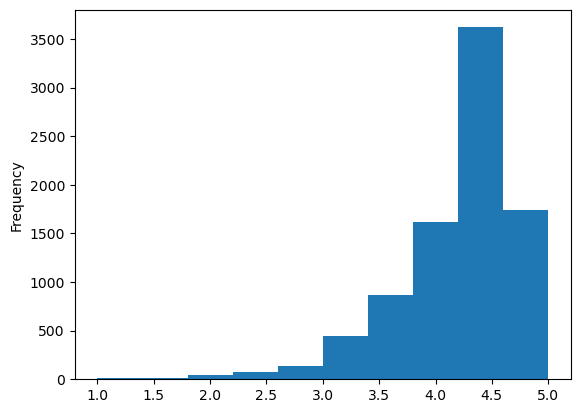

In [147]:
#Create a distribution plot for rating
inp1.Rating.plot.hist()
plt.show()

In [104]:
#Change the number of bins
import seaborn as sns



<Axes: xlabel='Rating', ylabel='Density'>

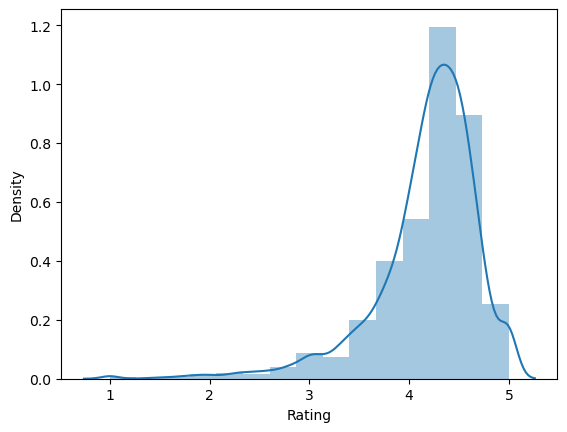

In [149]:
#Change the colour of bins to green
sns.distplot(inp1.Rating, bins=15)

<Axes: xlabel='Rating', ylabel='Density'>

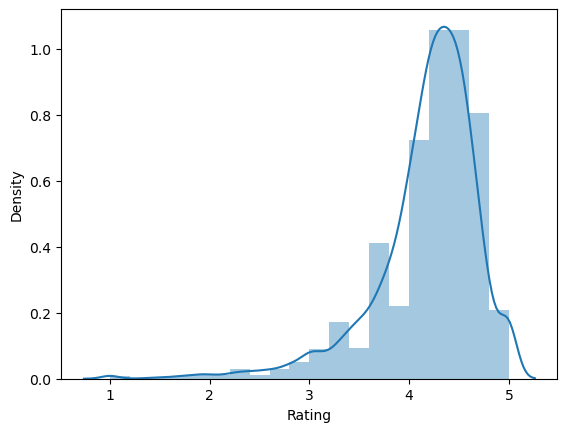

In [150]:
#Apply matplotlib functionalities
sns.distplot(inp1.Rating, bins=20)


<Axes: xlabel='Rating', ylabel='Density'>

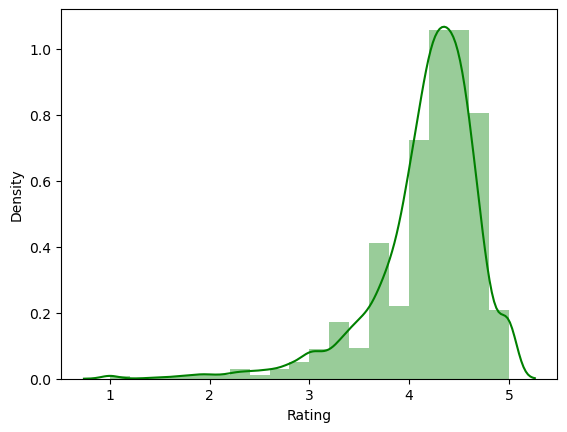

In [152]:
sns.distplot(inp1.Rating, bins=20, color='g')

Text(0.5, 1.0, 'Distribution of app ratings')

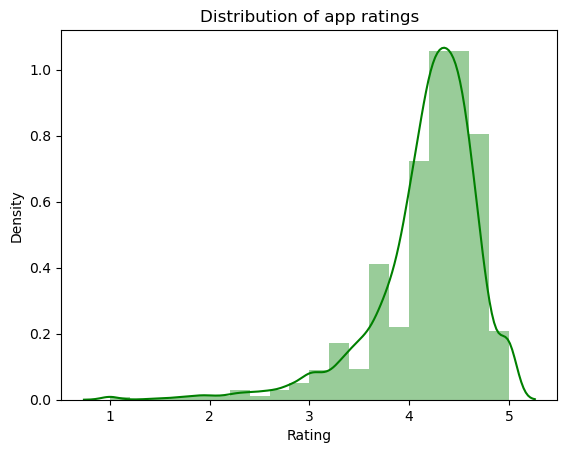

In [153]:
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [154]:
#Check all the styling options
?sns.set_style

Signature: sns.set_style(style=None, rc=None)
Docstring:
Set the parameters that control the general style of the plots.

The style parameters control properties like the color of the background and
whether a grid is enabled by default. This is accomplished using the
matplotlib rcParams system.

The options are illustrated in the
:doc:`aesthetics tutorial <../tutorial/aesthetics>`.

See :func:`axes_style` to get the parameter values.

Parameters
----------
style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
    A dictionary of parameters or the name of a preconfigured style.
rc : dict, optional
    Parameter mappings to override the values in the preset seaborn
    style dictionaries. This only updates parameters that are
    considered part of the style definition.

Examples
--------

.. include:: ../docstrings/set_style.rst
File:      c:\users\mohammaduddin\anaconda3\lib\site-packages\seaborn\rcmod.py
Type:      function

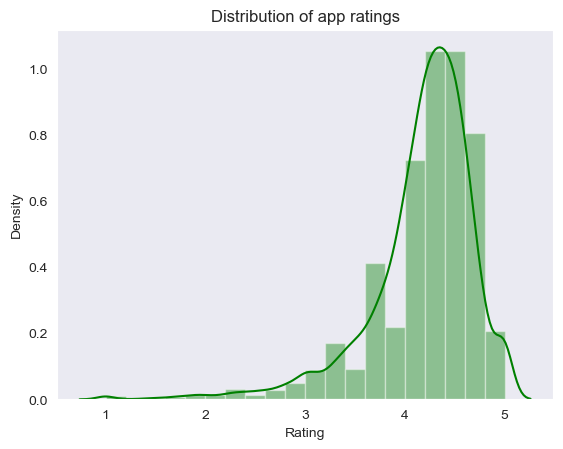

In [155]:
#Change the number of bins to 20
sns.set_style("dark")
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

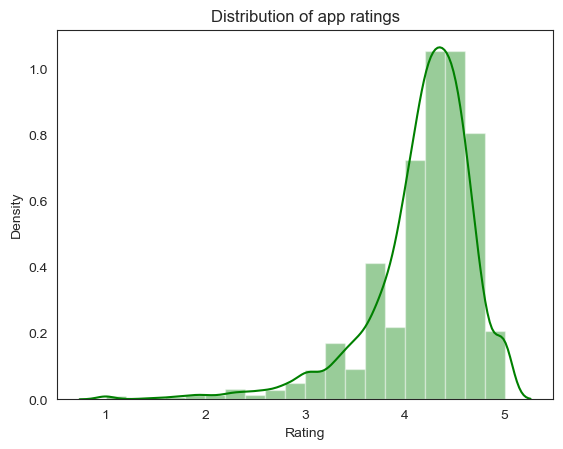

In [157]:
sns.set_style("white")
sns.distplot(inp1.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

In [158]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

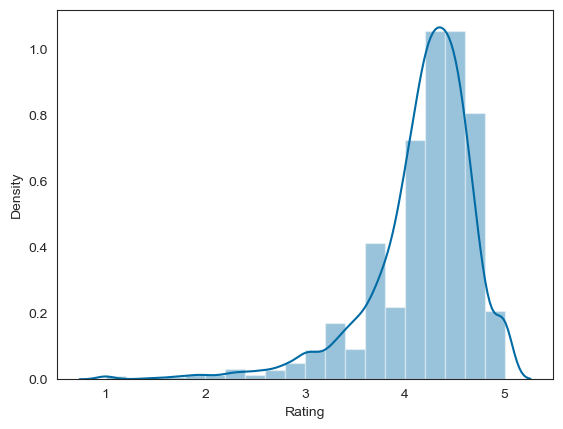

In [159]:
plt.style.use("tableau-colorblind10")
sns.distplot(inp1.Rating, bins=20)
plt.show()

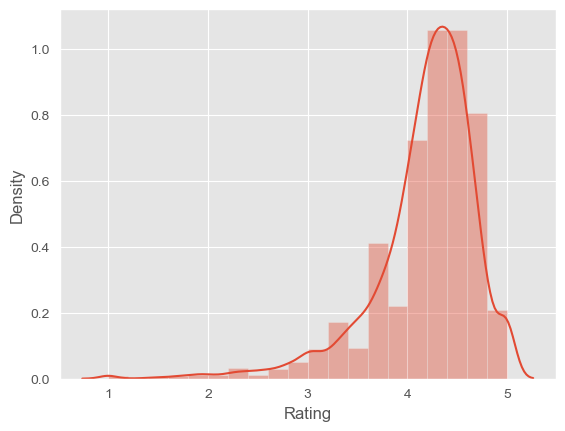

In [160]:
plt.style.use("ggplot")
sns.distplot(inp1.Rating, bins=20)
plt.show()

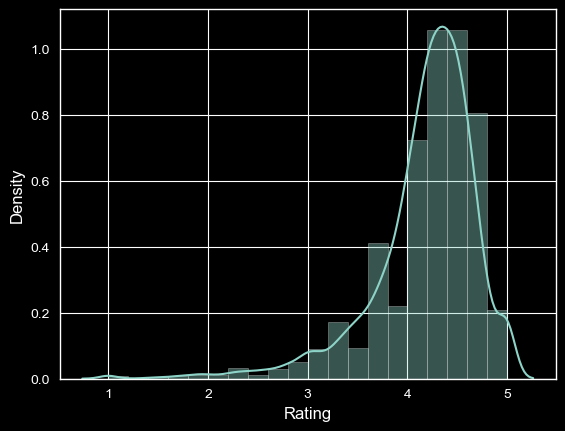

In [161]:
plt.style.use("dark_background")
sns.distplot(inp1.Rating, bins=20)
plt.show()

In [162]:
plt.style.use("default")
%matplotlib inline

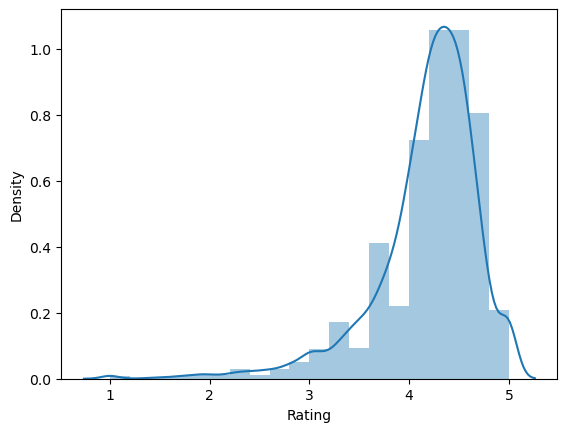

In [163]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [164]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Content Rating
Everyone           6898
Teen                918
Mature 17+          417
Everyone 10+        336
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [166]:
#Remove the rows with values which are less represented 
inp1 = inp1[~inp1['Content Rating'].isin(["Adults only 18+", "Unrated"])]


In [168]:
#Reset the index
inp1.shape
inp1.reset_index(inplace=True, drop=True)

In [170]:
#Check the apps belonging to different categories of Content Rating 
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8569 non-null   object 
 1   Category        8569 non-null   object 
 2   Rating          8569 non-null   float64
 3   Reviews         8569 non-null   int32  
 4   Size            8569 non-null   float64
 5   Installs        8569 non-null   int32  
 6   Type            8569 non-null   object 
 7   Price           8569 non-null   float64
 8   Content Rating  8569 non-null   object 
 9   Genres          8569 non-null   object 
 10  Last Updated    8569 non-null   object 
 11  Current Ver     8569 non-null   object 
 12  Android Ver     8569 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 803.5+ KB


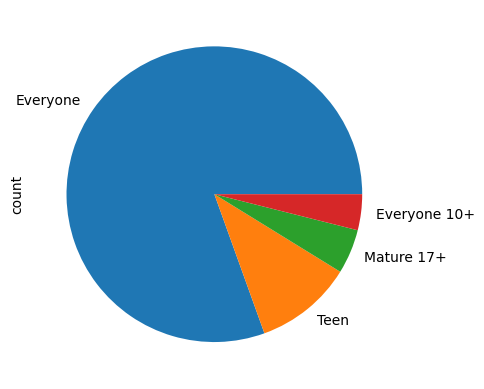

In [172]:
#Plot a pie chart
inp1['Content Rating'].value_counts()
inp1['Content Rating'].value_counts().plot.pie()
plt.show()


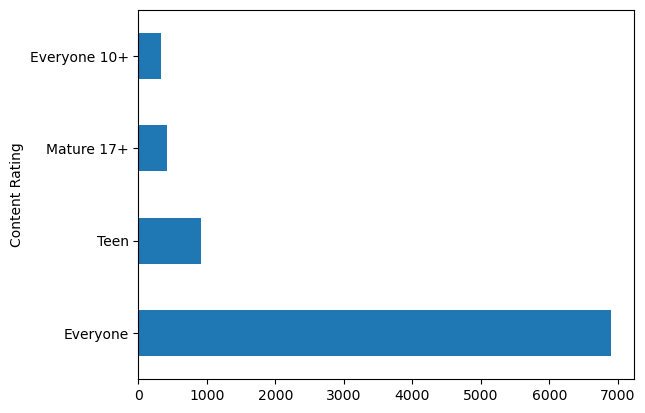

In [175]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

<Axes: ylabel='Android Ver'>

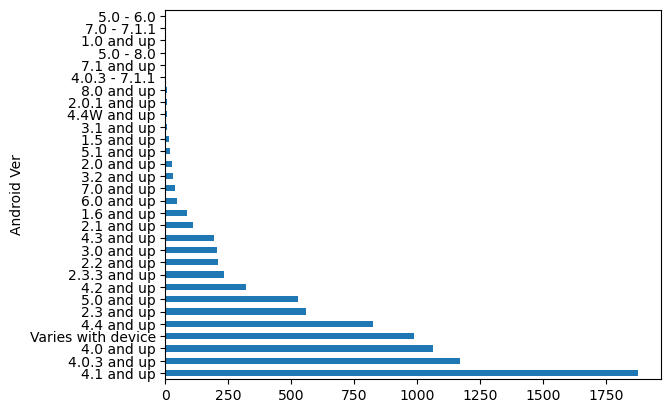

In [177]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp1['Android Ver'].value_counts().plot.barh()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

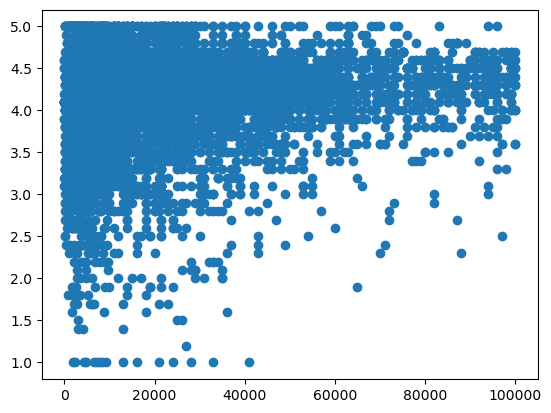

In [178]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

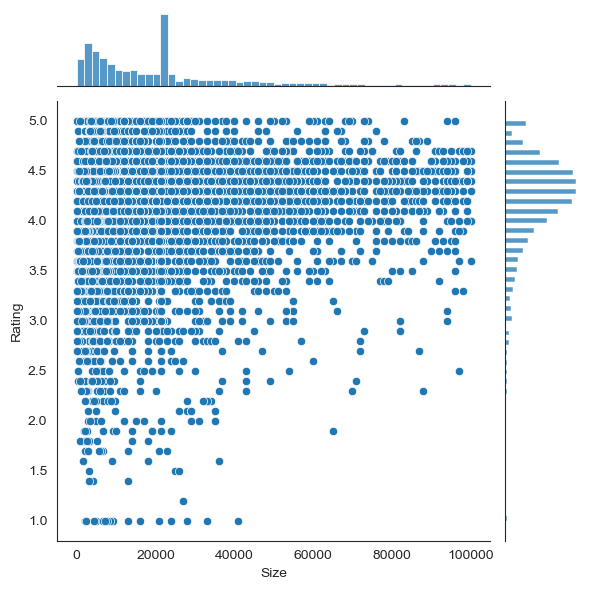

In [182]:
### Plot the same thing now using a jointplot
sns.set_style("white")
sns.jointplot(x=inp1.Size, y=inp1.Rating)
plt.show()

In [184]:
?sns.jointplot

Signature:
sns.jointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    color=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that s

<Figure size 1000x1000 with 0 Axes>

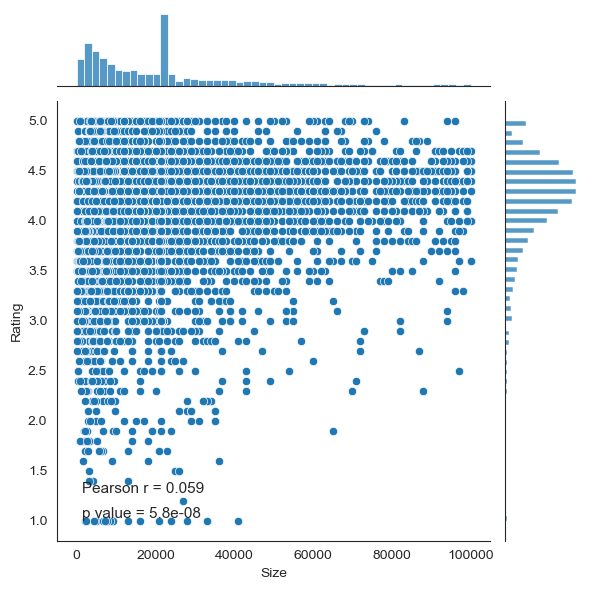

In [198]:
## Plot a jointplot for Price and Rating
import scipy.stats as stats
str1 = 'Pearson r = {}'.format(stats.pearsonr(inp1.Size,inp1.Rating)[0].round(3))
str2 = 'p value = {}'.format(stats.pearsonr(inp1.Size,inp1.Rating)[1].round(9))   
plt.figure(figsize = (10,10))
sns.jointplot(x=inp1.Size, y=inp1.Rating, )
plt.text(1250,1.25, str1,horizontalalignment='left',verticalalignment='bottom',fontsize = 11 )
plt.text(1250,1.0,str2,horizontalalignment='left',verticalalignment='bottom',fontsize = 11)
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

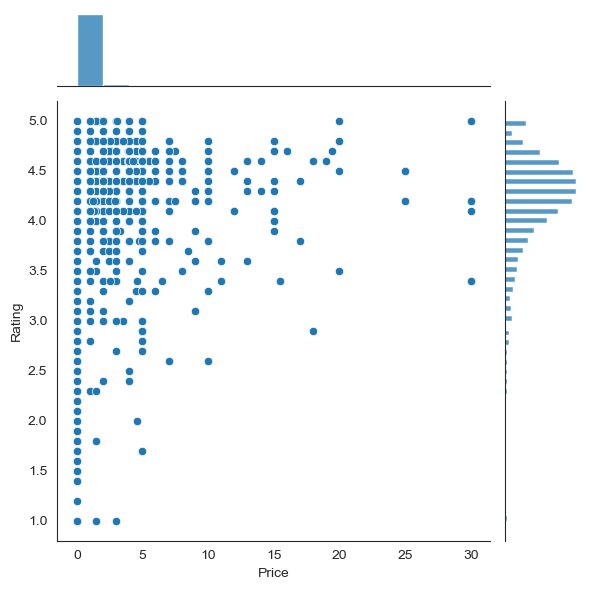

In [201]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(x=inp1.Price, y=inp1.Rating)
plt.show()


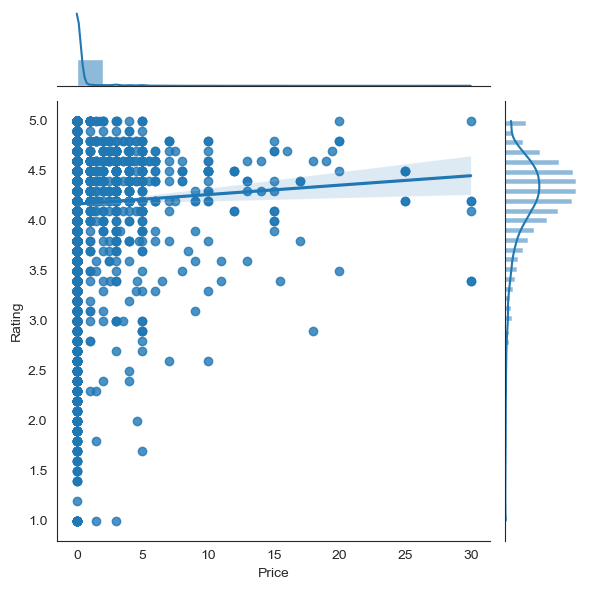

In [202]:
sns.jointplot(x=inp1.Price, y=inp1.Rating, kind="reg")
plt.show()

In [ ]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.


**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

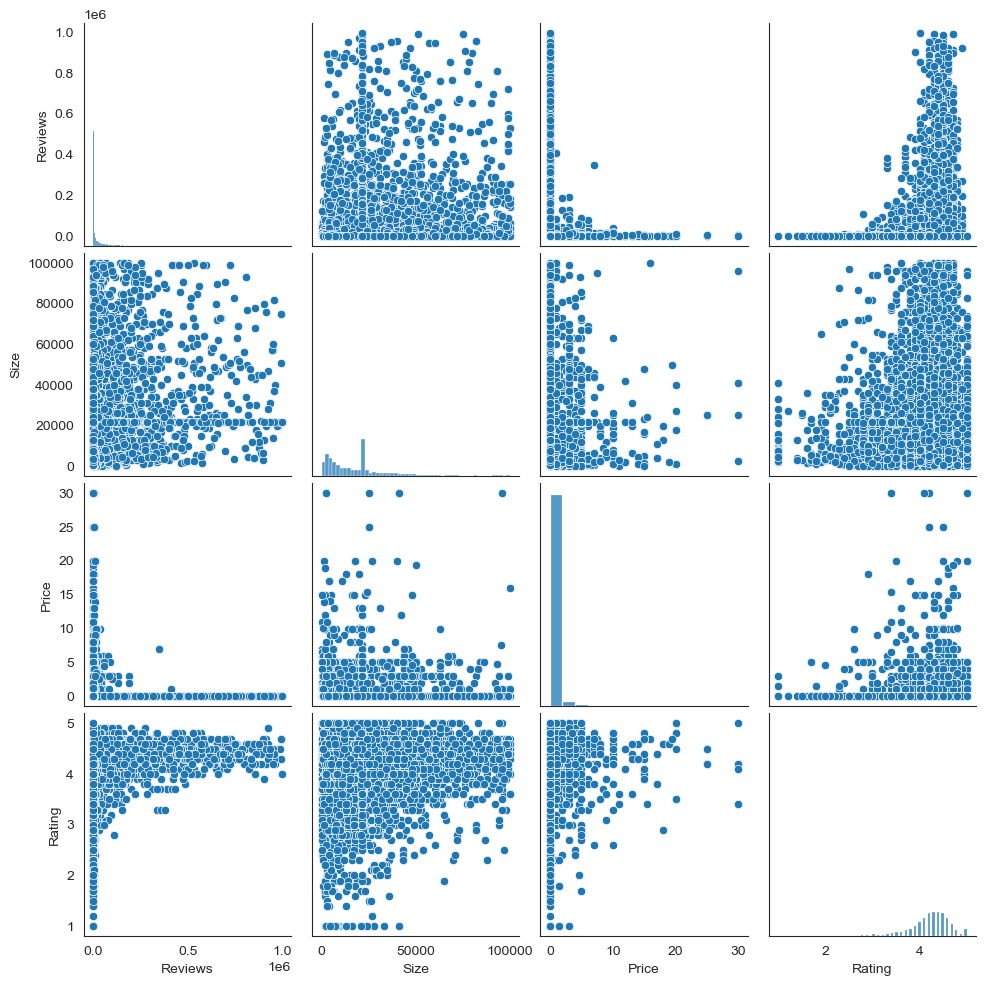

In [204]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1[['Reviews', 'Size', 'Price','Rating']])
plt.show()



**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<Axes: xlabel='Content Rating'>

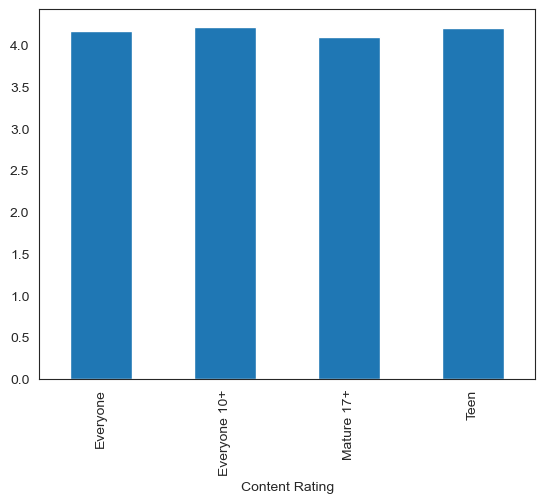

In [205]:
##Plot a bar plot of Content Rating vs Average Rating 
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<Axes: xlabel='Content Rating'>

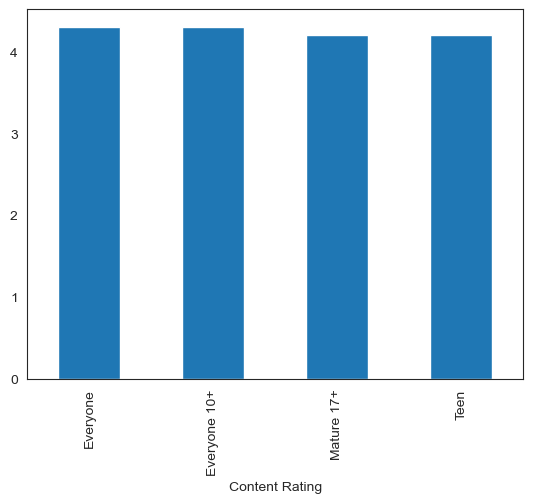

In [207]:
##Plot the bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

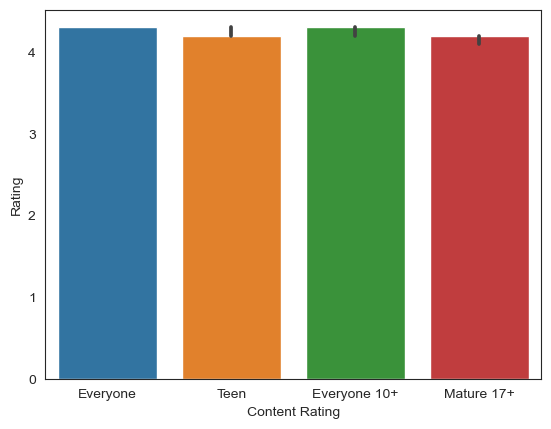

In [209]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.median)
plt.show()


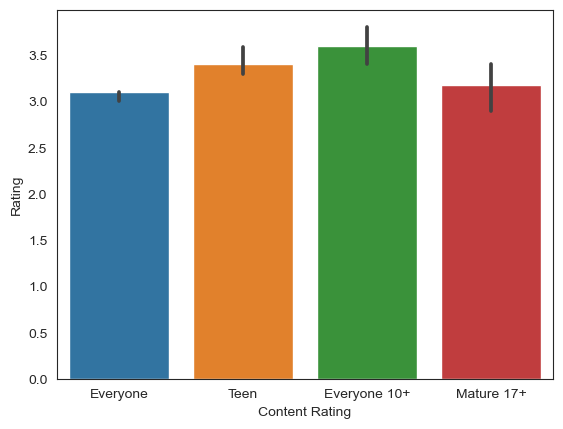

In [210]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=lambda x: np.quantile(x,0.05))
plt.show()

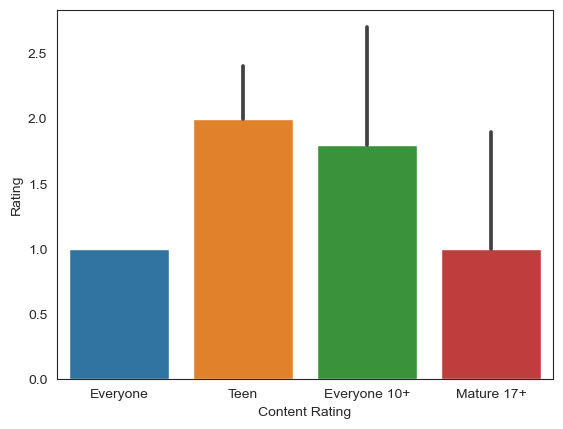

In [211]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.min)
plt.show()

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




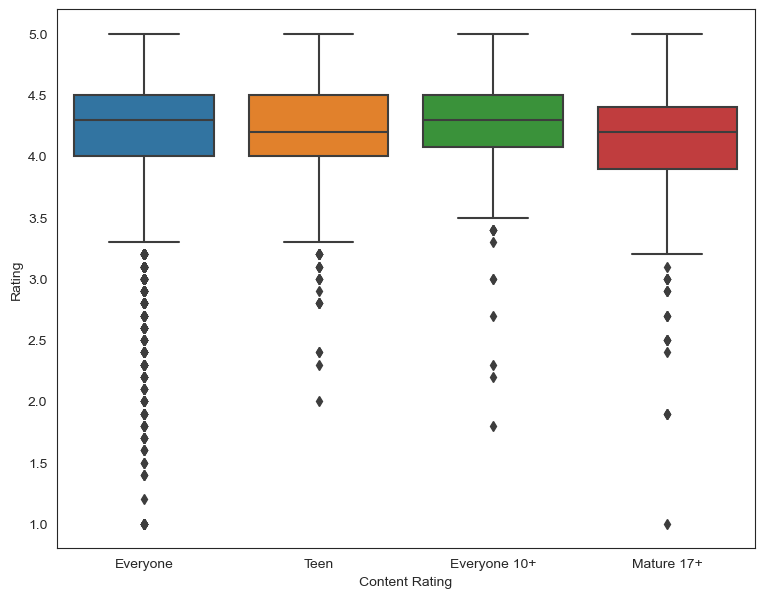

In [214]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(x=inp1['Content Rating'], y=inp1.Rating)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1859bb80ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1859bb81c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1859bb801d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1859bb83210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1859badd890>],
 'means': []}

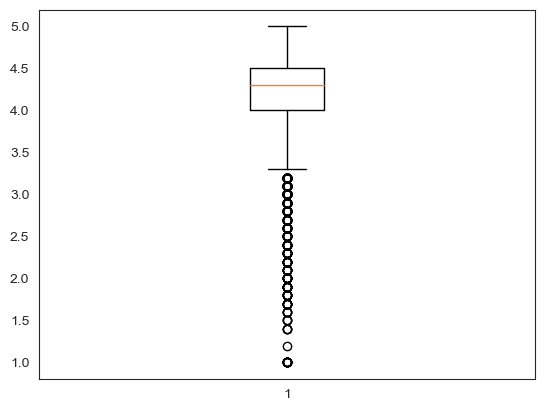

In [215]:
##Question - Plot a box plot for the Rating column only
plt.boxplot(inp1.Rating)

<Axes: >

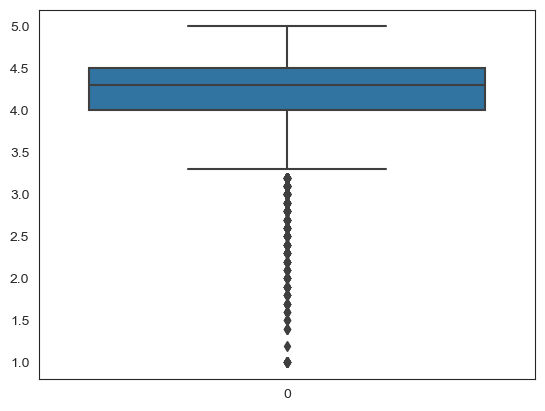

In [216]:
sns.boxplot(inp1.Rating)

<Axes: xlabel='Genres', ylabel='Rating'>

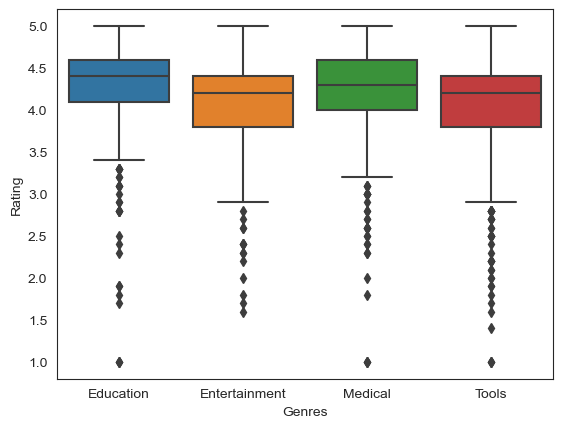

In [249]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
inp1.Genres.value_counts()[:4].index.tolist()
a = inp1[inp1.Genres.isin(inp1.Genres.value_counts()[:4].index.tolist())]
sns.boxplot(x=a.Genres, y=a.Rating)


#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [250]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut
inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL", "L", "M", "H", "VH"])
inp1.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [251]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.116677,4.158290,4.215450,4.170994,4.187102
Everyone 10+,4.188889,4.207143,4.238318,4.193443,4.216393
Mature 17+,3.951429,4.129592,4.021705,4.155172,4.193814
Teen,4.220213,4.208511,4.141637,4.198131,4.246102


In [252]:
##Change the aggregation to median
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.3,4.3,4.3,4.3
Everyone 10+,4.1,4.3,4.3,4.3,4.3
Mature 17+,4.2,4.2,4.1,4.1,4.2
Teen,4.3,4.3,4.2,4.2,4.3


In [253]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=lambda x: np.quantile(x, 0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.84,3.94,4.1,4.0,4.0
Mature 17+,3.28,3.64,3.7,3.9,4.0
Teen,3.86,3.80,3.9,4.0,4.0


In [254]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=lambda x: np.quantile(x, 0.2))

<Axes: xlabel='Size_Bucket', ylabel='Content Rating'>

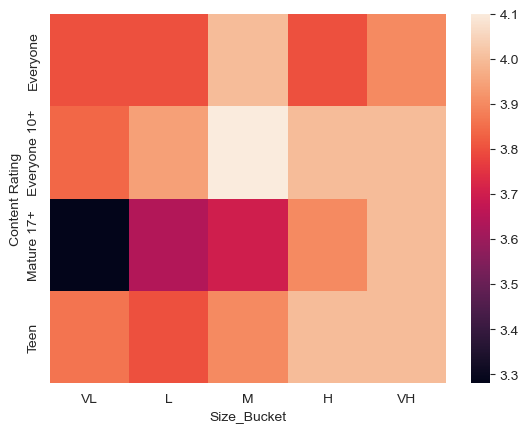

In [255]:
##Plot a heat map
sns.heatmap(res)

<Axes: xlabel='Size_Bucket', ylabel='Content Rating'>

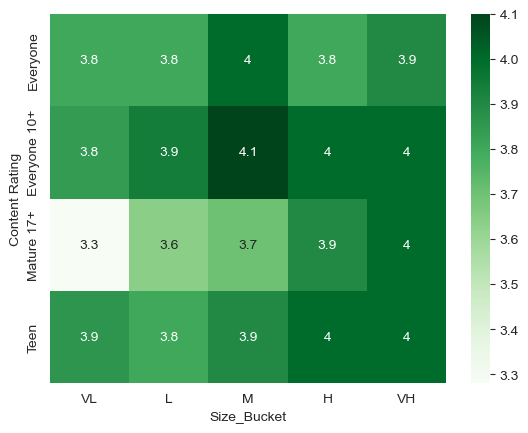

In [257]:
##Apply customisations
sns.heatmap(res, cmap="Greens", annot=True)

<Axes: xlabel='Review_Bucket', ylabel='Content Rating'>

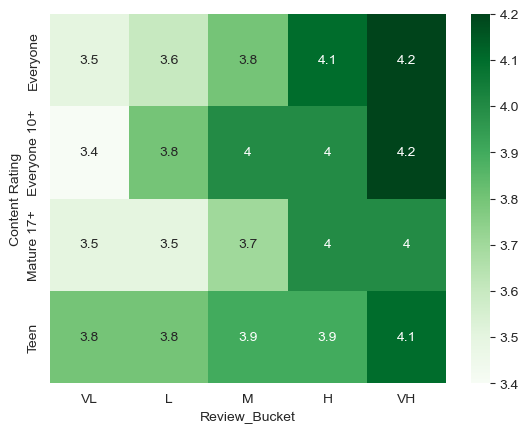

In [260]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
#inp1['Review_Bucket'] = pd.qcut(inp1.Reviews, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL", "L", "M", "H", "VH"])
#res = pd.pivot_table(data=inp1, index="Content Rating", columns="Review_Bucket", values="Rating", aggfunc=lambda x: np.quantile(x, 0.2))
sns.heatmap(res, cmap="Greens", annot=True)

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [261]:
## Extract the month from the Last Updated Date
inp1.dtypes


App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
Review_Bucket     category
dtype: object

In [263]:
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [266]:
inp1['Updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month

<Axes: xlabel='Updated_month'>

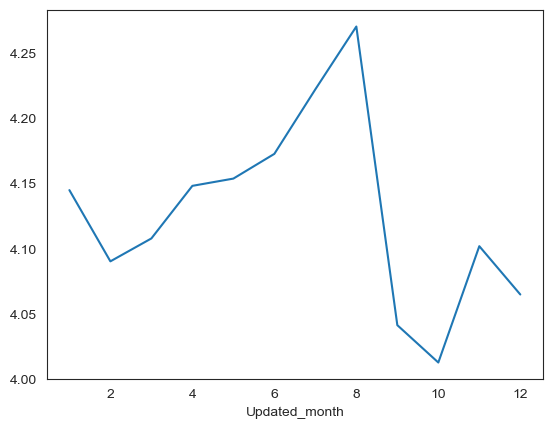

In [268]:
## Find the average Rating across all the months
inp1.groupby(['Updated_month'])['Rating'].mean().plot()


In [ ]:
## Plot a line graph



#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [269]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1, values="Installs", index="Updated_month", columns="Content Rating", aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_month,,,,
1,725387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1461067800,118173500,50140100,202689600
6,2127170505,217727100,145257200,415716600
7,6371109680,456556000,419491910,1143556800
8,4430943320,215821000,312981700,1057855650
9,260340410,24931100,2201010,22483100


In [270]:
##Store the table in a separate variable
monthly = pd.pivot_table(data=inp1, values="Installs", index="Updated_month", columns="Content Rating", aggfunc=sum)

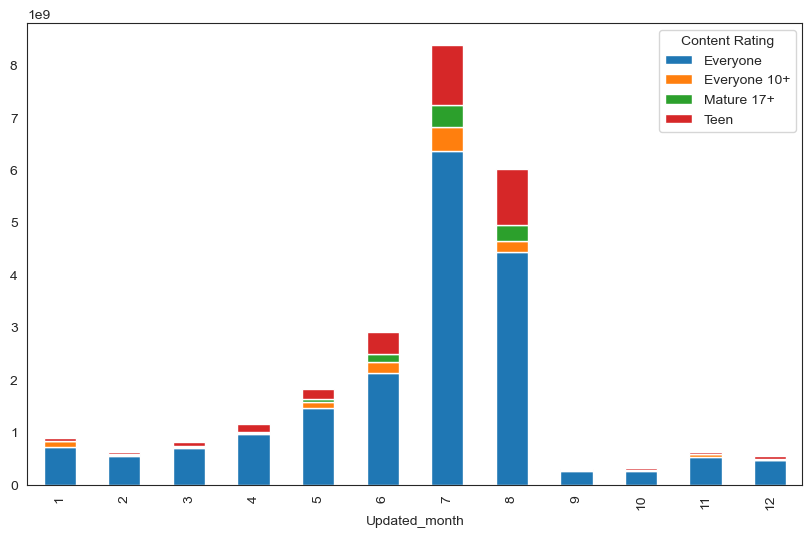

In [271]:
##Plot the stacked bar chart.
monthly.plot(kind="bar", stacked="True", figsize=[10, 6])
plt.show()

<Axes: xlabel='Updated_month'>

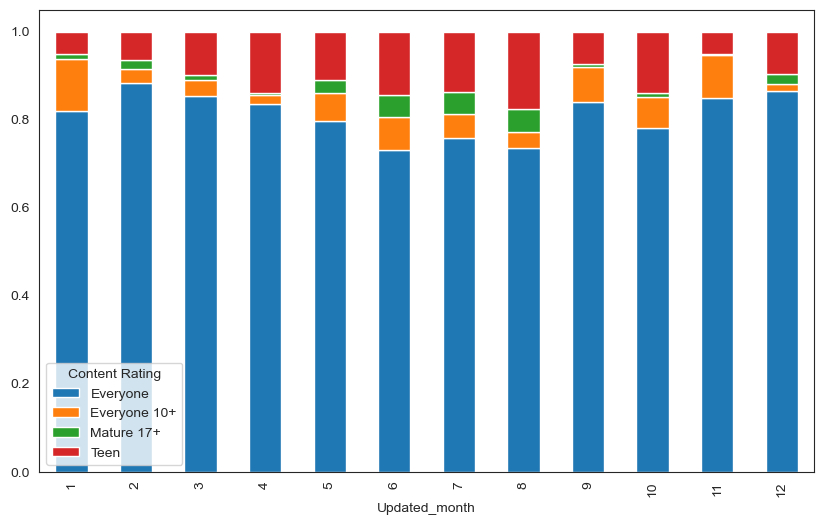

In [272]:
##Plot the stacked bar chart again wrt to the proportions.

monthly_perc = monthly[["Everyone", "Everyone 10+", "Mature 17+", "Teen"]].apply(lambda x: x/x.sum(), axis=1)
monthly_perc.plot(kind="bar", stacked="True", figsize=[10, 6])

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [ ]:
#Install plotly


In [ ]:
#Take the table you want to plot in a separate variable


In [ ]:
#Import the plotly libraries


In [ ]:
#Prepare the plot
